In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from tkinter import filedialog
from sklearn.preprocessing import MinMaxScaler

In [2]:
def load_data(file_path):
    if file_path.endswith('.csv') or file_path.endswith('.txt'):
        data = pd.read_csv(file_path, header=None, sep='\s+')
        data.columns = [f"Column {i + 1}" for i in range(data.shape[1])]
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Use .csv, .txt, or .xlsx.")
    
    return data

In [3]:
file_path = 'D:/University/Data Analysis & Machine Learning 4 course/data_lab1_змодельовані/data_lab1_�����������/1.txt'
data = load_data(file_path)
print("Data Loaded:")
display(data)

Data Loaded:


C:\Users\kiruhafighter\AppData\Local\Temp\ipykernel_21488\3595241217.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, header=None, delim_whitespace=True)


,Column 1,Column 2
0,227.5921,111.0161
1,247.7641,59.4956
2,73.4457,-1.5353
3,227.6755,111.2483
4,257.4967,79.7010
...,...,...
95,144.8365,9.8505
96,75.7902,77.5756
97,243.5875,108.4532
98,75.3654,47.0155


In [4]:
def show_available_features(data):
    print("Available features (columns):")
    for i, column in enumerate(data.columns):
        print(f"{i + 1}: {column}")

In [5]:
show_available_features(data)

Available features (columns):
1: Column 1
2: Column 2


In [6]:
feature_x = "Column 1"  # Replace with your desired feature
feature_y = "Column 2"  # Replace with your desired feature
print(f"Selected features: X-axis: {feature_x}, Y-axis: {feature_y}")

Selected features: X-axis: Column 1, Y-axis: Column 2


In [7]:
def build_scatter_plot(data, feature_x, feature_y):
    plt.scatter(data[feature_x], data[feature_y], s=50, alpha=0.6)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title("Scatter Plot of Selected Features")
    plt.show()

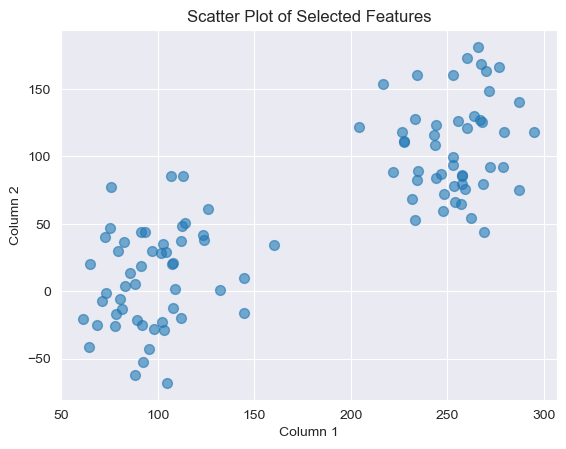

In [8]:
build_scatter_plot(data, feature_x, feature_y)

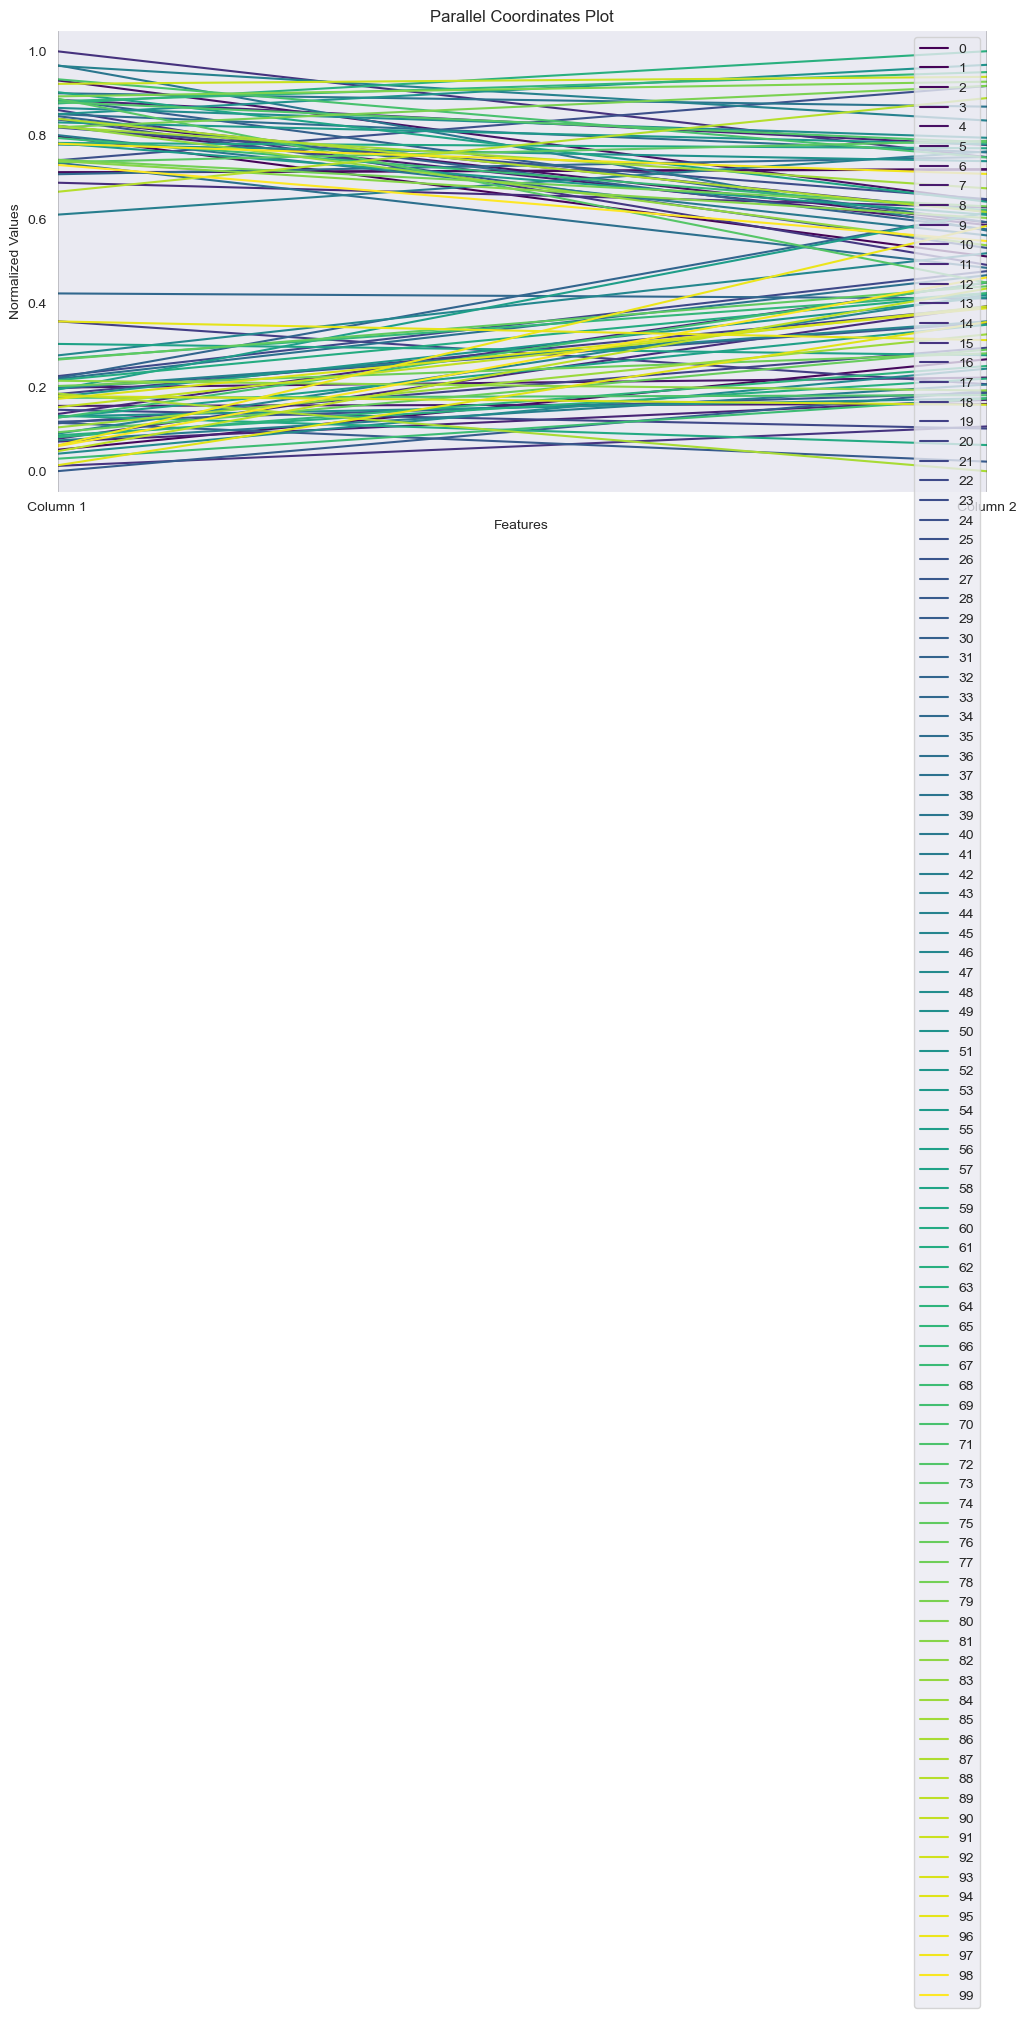

In [9]:
from pandas.plotting import parallel_coordinates

def parallel_coordinates_plot(data):
    normalized_data = MinMaxScaler().fit_transform(data)
    norm_df = pd.DataFrame(normalized_data, columns=data.columns)
    norm_df["Index"] = range(len(data))  # Add an index column for the plot
    
    plt.figure(figsize=(12, 6))
    parallel_coordinates(norm_df, "Index", colormap='viridis')
    plt.title("Parallel Coordinates Plot")
    plt.xlabel("Features")
    plt.ylabel("Normalized Values")
    plt.show()

parallel_coordinates_plot(data)

In [10]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data)
    data['Cluster'] = clusters
    return data, kmeans

In [11]:
n_clusters = 2
clustered_data, kmeans_model = kmeans_clustering(data, n_clusters)
display(clustered_data)

D:\Tools\AnacondaDistro\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Column 1,Column 2,Cluster
0,227.5921,111.0161,0
1,247.7641,59.4956,0
2,73.4457,-1.5353,1
3,227.6755,111.2483,0
4,257.4967,79.7010,0
...,...,...,...
95,144.8365,9.8505,1
96,75.7902,77.5756,1
97,243.5875,108.4532,0
98,75.3654,47.0155,1


In [12]:
def hierarchical_clustering(data, n_clusters):
    linkage_matrix = linkage(data, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    data['Hierarchical_Cluster'] = clusters
    return data, linkage_matrix

In [13]:
clustered_data, linkage_matrix = hierarchical_clustering(data, n_clusters)
display(clustered_data)

,Column 1,Column 2,Cluster,Hierarchical_Cluster
0,227.5921,111.0161,0,1
1,247.7641,59.4956,0,1
2,73.4457,-1.5353,1,2
3,227.6755,111.2483,0,1
4,257.4967,79.7010,0,1
...,...,...,...,...
95,144.8365,9.8505,1,2
96,75.7902,77.5756,1,2
97,243.5875,108.4532,0,1
98,75.3654,47.0155,1,2


In [14]:
def scatter_plot_clusters(data, feature_x, feature_y, cluster_col):
    plt.scatter(data[feature_x], data[feature_y], c=data[cluster_col], cmap='viridis', s=50, alpha=0.6)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title("Clustered Data (Scatter Plot)")
    plt.colorbar(label='Cluster')
    plt.show()

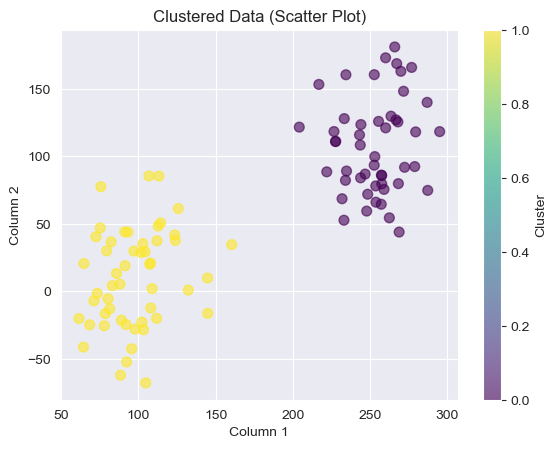

In [15]:
scatter_plot_clusters(clustered_data, feature_x, feature_y, 'Cluster')

In [16]:
def parallel_coordinates_clusters(data, cluster_col):
    plt.figure(figsize=(12, 6))
    parallel_coordinates(data, cluster_col, colormap='viridis')
    plt.title("Clustered Data (Parallel Coordinates Plot)")
    plt.show()

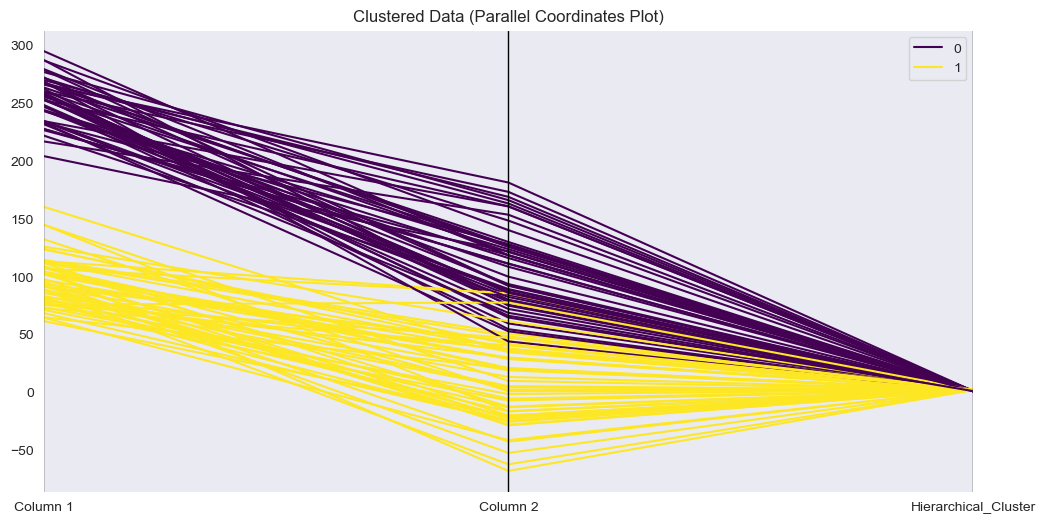

In [17]:
parallel_coordinates_clusters(clustered_data, 'Cluster')

In [18]:
def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=10)
    plt.title("Dendrogram (Ward's Method)")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")
    plt.show()

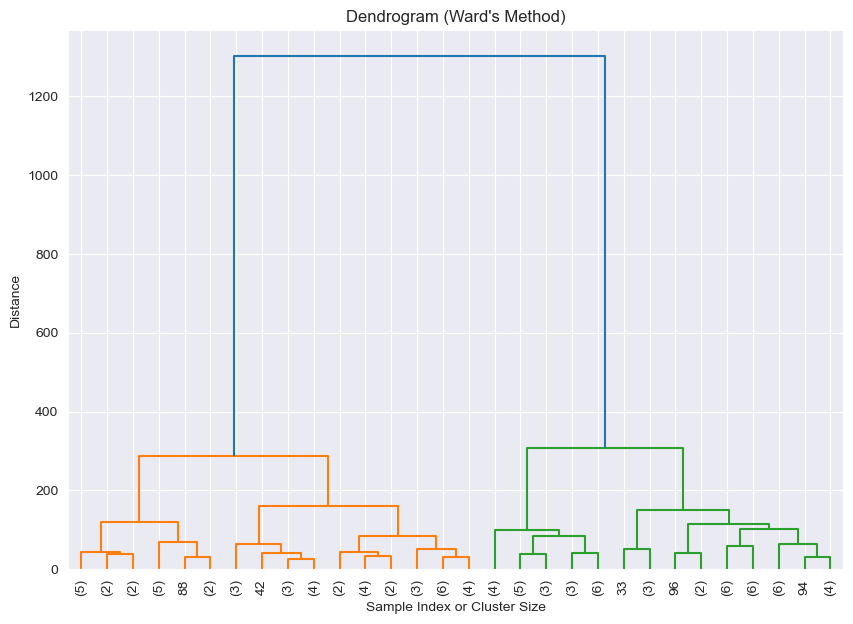

In [19]:
plot_dendrogram(linkage_matrix)

In [20]:
def calculate_dunn_index(data, clusters):
    unique_clusters = np.unique(clusters)
    num_clusters = len(unique_clusters)
    
    # Inter-cluster distances
    inter_distances = []
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i = data[clusters == unique_clusters[i]]
            cluster_j = data[clusters == unique_clusters[j]]
            dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_distances.append(dist)
    
    # Intra-cluster distances
    intra_distances = []
    for cluster in unique_clusters:
        cluster_points = data[clusters == cluster]
        if len(cluster_points) > 1:
            dist = np.max(pairwise_distances(cluster_points, cluster_points))
        else:
            dist = 0
        intra_distances.append(dist)
    
    # Calculate Dunn Index
    return np.min(inter_distances) / np.max(intra_distances)

In [21]:
results = []
for k in range(2, 10):
    _, kmeans_model = kmeans_clustering(data, k)
    dunn = calculate_dunn_index(data.values, kmeans_model.labels_)
    results.append((k, dunn))

D:\Tools\AnacondaDistro\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Tools\AnacondaDistro\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Tools\AnacondaDistro\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Tools\AnacondaDistro\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

,Number of Clusters,Dunn Index
0,2,0.487609
1,3,0.060585
2,4,0.087871
3,5,0.087871
4,6,0.083048
5,7,0.073789
6,8,0.064270
7,9,0.120078


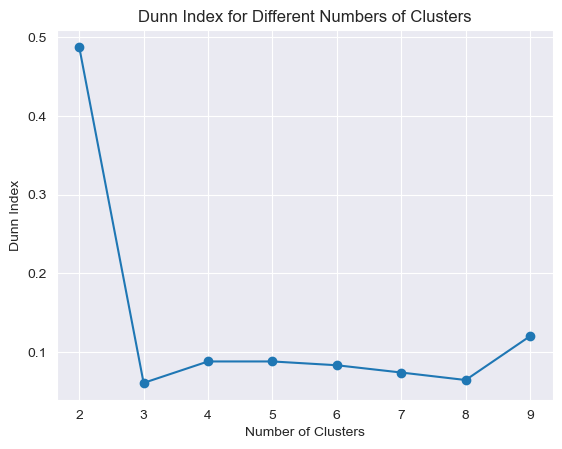

In [22]:
dunn_df = pd.DataFrame(results, columns=['Number of Clusters', 'Dunn Index'])
display(dunn_df)

# Plot results
plt.plot(dunn_df['Number of Clusters'], dunn_df['Dunn Index'], marker='o')
plt.title("Dunn Index for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.show()

In [23]:
def calculate_cluster_means(data, cluster_col):
    cluster_means = data.groupby(cluster_col).mean()
    return cluster_means

In [24]:
cluster_means = calculate_cluster_means(clustered_data, 'Cluster')
display(cluster_means)

,Column 1,Column 2,Hierarchical_Cluster
Cluster,,,
0,98.663567,82.852067,2.0
1,254.755583,76.637796,1.0
2,82.698900,8.012120,2.0
3,271.857650,125.838037,1.0
4,89.334441,-30.864788,2.0
5,102.885006,38.465247,2.0
6,228.866170,118.072180,1.0
7,145.614575,7.251575,2.0
8,262.297425,165.262862,1.0
